# WeatherPy
----

### Analysis
* The weather becomes warmer as you get closer to the equator (0 degrees Latitude).
* The cities at the equator tend to have a smaller spread of humidity (closer to 100%), than cities farther from the equator. 
* Many cities have at 0, 20, 80, and 100% cloudiness. However, there does not appear to be a relationship between latitude and cloudiness. 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
#list_of_cities, = cities
cities_df = pd.DataFrame({
    "Cities": cities,
    "Cloudiness": '', 
    "Country": '', 
    "Date": '', 
    "Humidity": '',
    "Latitude": '', 
    "Longitude": '', 
    "Max Temp": '', 
    "Wind Speed": ''
    })
cities_df.head()


,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,rikitea,,,,,,,,
1,sierra vista,,,,,,,,
2,bluff,,,,,,,,
3,punta arenas,,,,,,,,
4,attawapiskat,,,,,,,,


In [17]:
print('''Beginning Data Retrival
---------------------
''')

row_count = 1
index = 0 

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}units=Imperial&appid={api_key}&q={city}"
    weather_response = requests.get(query_url).json()
    
    print(f"Processing Record {row_count} | {city}")
    print(query_url)
    
    try:
        cities_df.at[index, "Cloudiness"] = int(weather_response.get("clouds").get("all"))
        cities_df.at[index, "Country"] = weather_response.get("sys").get("country")
        cities_df.at[index, "Date"] = weather_response.get("dt")
        cities_df.at[index, "Humidity"] = int(weather_response.get("main").get("humidity"))
        cities_df.at[index, "Latitude"] = int(weather_response.get("coord").get("lat"))
        cities_df.at[index, "Longitude"] = int(weather_response.get("coord").get("lon"))
        cities_df.at[index, "Max Temp"] = int(weather_response.get("main").get("temp_max"))
        cities_df.at[index, "Wind Speed"] = int(weather_response.get("wind").get("speed"))
        
        
    except (AttributeError) as e:
        print("Missing Field. Skipping")
    
    row_count += 1
    index += 1
    
    cities_df.to_csv("output_data/cities.csv")
    

Beginning Data Retrival
---------------------

Processing Record 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=rikitea
Processing Record 2 | sierra vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=sierra vista
Processing Record 3 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=bluff
Processing Record 4 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=punta arenas
Processing Record 5 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=attawapiskat
Missing Field. Skipping
Processing Record 6 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=itarema
Processing Record 7 | kasulu
http://api.openweathermap.or

Processing Record 57 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=hermanus
Processing Record 58 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=meulaboh
Processing Record 59 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=ostrovnoy
Processing Record 60 | xilokastron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=xilokastron
Missing Field. Skipping
Processing Record 61 | matagami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=matagami
Processing Record 62 | mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=mayo
Processing Record 63 | khonuu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb4

Processing Record 113 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=tsihombe
Missing Field. Skipping
Processing Record 114 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=broome
Processing Record 115 | kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=kirakira
Processing Record 116 | nakambala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=nakambala
Processing Record 117 | erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=erenhot
Processing Record 118 | trelew
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=trelew
Processing Record 119 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79f

Processing Record 170 | alingsas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=alingsas
Processing Record 171 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=saint-philippe
Processing Record 172 | harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=harper
Processing Record 173 | tataranu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=tataranu
Processing Record 174 | vryburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=vryburg
Processing Record 175 | byron bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=byron bay
Processing Record 176 | ashington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292

Processing Record 226 | miri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=miri
Processing Record 227 | miles city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=miles city
Processing Record 228 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=luderitz
Processing Record 229 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=flinders
Processing Record 230 | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=muros
Processing Record 231 | gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=gamba
Processing Record 232 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=sitka
Process

Processing Record 283 | amherst
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=amherst
Processing Record 284 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=sao filipe
Processing Record 285 | marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=marzuq
Processing Record 286 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=chapais
Processing Record 287 | avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=avera
Processing Record 288 | dustlik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=dustlik
Processing Record 289 | urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=urengoy

Processing Record 339 | nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=nome
Processing Record 340 | progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=progreso
Processing Record 341 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=quatre cocos
Processing Record 342 | tawkar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=tawkar
Missing Field. Skipping
Processing Record 343 | kindia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=kindia
Processing Record 344 | willmar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=willmar
Processing Record 345 | aflu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d29

Processing Record 395 | el badari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=el badari
Missing Field. Skipping
Processing Record 396 | pavda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=pavda
Missing Field. Skipping
Processing Record 397 | nagapattinam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=nagapattinam
Processing Record 398 | porto walter
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=porto walter
Processing Record 399 | rio grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=rio grande
Processing Record 400 | yining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=yining
Processing Record 401 | alice springs
http://api.openweathermap.org/da

Processing Record 453 | chagda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=chagda
Missing Field. Skipping
Processing Record 454 | glace bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=glace bay
Processing Record 455 | sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=sangar
Processing Record 456 | sharjah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=sharjah
Processing Record 457 | batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=batemans bay
Processing Record 458 | ranfurly
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=ranfurly
Processing Record 459 | nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e

Processing Record 509 | nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=nioro
Processing Record 510 | manono
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=manono
Processing Record 511 | iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=iquitos
Processing Record 512 | ossora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=ossora
Processing Record 513 | yima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=yima
Processing Record 514 | dunmore town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=dunmore town
Processing Record 515 | hayato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=hayato
Missi

Processing Record 565 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=bubaque
Processing Record 566 | wasilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=wasilla
Processing Record 567 | zhaotong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=zhaotong
Processing Record 568 | ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=ketchikan
Processing Record 569 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=qaqortoq
Processing Record 570 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7d7e55e79fb420d292c417f79420dc&q=olafsvik
Missing Field. Skipping
Processing Record 571 | marsa matruh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=6b7

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,rikitea,8,PF,1554694262,100,-23,-134,77,5
1,sierra vista,1,US,1554694442,34,31,-110,69,11
2,bluff,0,AU,1554694201,43,-23,149,84,10
3,punta arenas,20,CL,1554692547,80,-53,-70,39,5
4,attawapiskat,,,,,,,,


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [19]:
cols = ["Cloudiness","Humidity","Latitude","Longitude","Max Temp","Wind Speed"]
cities_df[cols] = cities_df[cols].apply(pd.to_numeric, errors = "coerce")
cities_df.dtypes

Cities         object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Latitude      float64
Longitude     float64
Max Temp      float64
Wind Speed    float64
dtype: object

#### Latitude vs. Temperature Plot

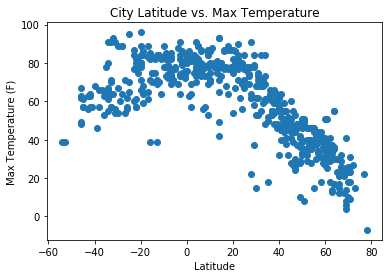

In [20]:
plt.scatter(cities_df["Latitude"], cities_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("City Latitude versus Max Temperature - Bubble Plot")
plt.show()

#### Latitude vs. Humidity Plot

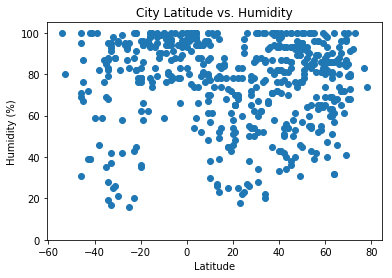

In [21]:
plt.scatter(cities_df["Latitude"], cities_df["Humidity"])
plt.ylim(0,105)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("City Latitude versus Humidity - Bubble Plot")
plt.show()

#### Latitude vs. Cloudiness Plot

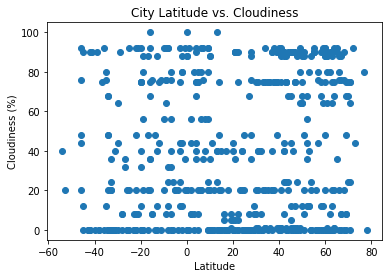

In [22]:
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("City Latitude versus Cloudiness - Bubble Plot")
plt.show()

#### Latitude vs. Wind Speed Plot

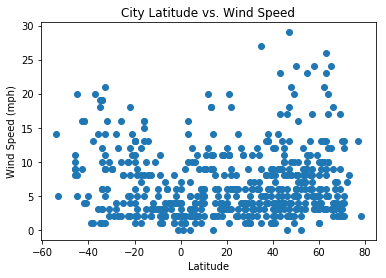

In [23]:
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("City Latitude versus Wind Speed - Bubble Plot")
plt.show()